In [2]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [3]:
# Loading all camera data...
xdf0 = pd.read_csv("/home/ubuntu/nitelite/fp810.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_UTC']) - pd.Timedelta(hours=4)

xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_EST'])
xdf0.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
529,2020-08-03 15:35:00,'/home/ubuntu/cams19/collegeTwp/20200803/20200...,collegeTwp.jpg',0,2020-08-03 11:35:00
284,2020-08-03 15:35:04,'/home/ubuntu/cams19/CAM02028CCTV32/20200803/2...,CAM02028CCTV32.jpg',0,2020-08-03 11:35:04
348,2020-08-03 15:35:06,'/home/ubuntu/cams19/CAM02037CCTV43/20200803/2...,CAM02037CCTV43.jpg',0,2020-08-03 11:35:06
383,2020-08-03 15:35:08,'/home/ubuntu/cams19/CAM02038CCTV44/20200803/2...,CAM02038CCTV44.jpg',0,2020-08-03 11:35:08
413,2020-08-03 15:35:10,'/home/ubuntu/cams19/CAM02039CCTV45/20200803/2...,CAM02039CCTV45.jpg',0,2020-08-03 11:35:10
...,...,...,...,...,...
224598,2020-08-10 17:18:14,'/home/ubuntu/cams19/CAM02039CCTV45/20200810/2...,CAM02039CCTV45.jpg',0,2020-08-10 13:18:14
224615,2020-08-10 17:18:16,'/home/ubuntu/cams19/CAM02040CCTV46/20200810/2...,CAM02040CCTV46.jpg',0,2020-08-10 13:18:16
224634,2020-08-10 17:18:18,'/home/ubuntu/cams19/CAM02042CCTV49/20200810/2...,CAM02042CCTV49.jpg',0,2020-08-10 13:18:18
224357,2020-08-10 17:18:20,'/home/ubuntu/cams19/CAM02003CCTV4/20200810/20...,CAM02003CCTV4.jpg',0,2020-08-10 13:18:20


In [4]:
# Loading all camera data...
xdf7 = pd.read_csv("/home/ubuntu/nitelite/full_pedestrians_427-803.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_UTC']) - pd.Timedelta(hours=4)

xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_EST'])
xdf7.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
2178177,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp.jpg,collegeTwp,0,2020-04-24 16:41:29
2176880,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
2177186,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
2177375,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
2177533,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
254745,2020-08-03 15:34:45,'/home/ubuntu/cams18/CAM02046CCTV52/20200803/2...,CAM02046CCTV52.jpg',0,2020-08-03 11:34:45
254336,2020-08-03 15:34:47,'/home/ubuntu/cams18/CAM02009CCTV7/20200803/20...,CAM02009CCTV7.jpg',0,2020-08-03 11:34:47
254081,2020-08-03 15:34:49,'/home/ubuntu/cams18/CAM02001CCTV2/20200803/20...,CAM02001CCTV2.jpg',0,2020-08-03 11:34:49
254373,2020-08-03 15:34:51,'/home/ubuntu/cams18/CAM02010CCTV11/20200803/2...,CAM02010CCTV11.jpg',0,2020-08-03 11:34:51


In [5]:
xdf = pd.concat([xdf0,xdf7])

In [6]:
xdf.columns

Index(['datetime_UTC', 'image_path', 'camera_name', 'pedestrian_count',
       'datetime_EST'],
      dtype='object')

In [7]:
xdf.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
2178177,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp.jpg,collegeTwp,0,2020-04-24 16:41:29
2176880,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
2177186,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
2177375,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
2177533,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
224598,2020-08-10 17:18:14,'/home/ubuntu/cams19/CAM02039CCTV45/20200810/2...,CAM02039CCTV45.jpg',0,2020-08-10 13:18:14
224615,2020-08-10 17:18:16,'/home/ubuntu/cams19/CAM02040CCTV46/20200810/2...,CAM02040CCTV46.jpg',0,2020-08-10 13:18:16
224634,2020-08-10 17:18:18,'/home/ubuntu/cams19/CAM02042CCTV49/20200810/2...,CAM02042CCTV49.jpg',0,2020-08-10 13:18:18
224357,2020-08-10 17:18:20,'/home/ubuntu/cams19/CAM02003CCTV4/20200810/20...,CAM02003CCTV4.jpg',0,2020-08-10 13:18:20


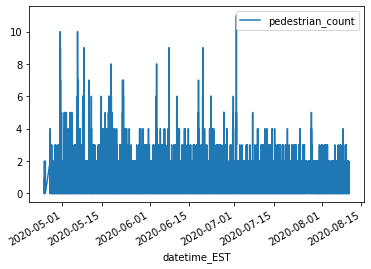

In [8]:
xdf.plot(x="datetime_EST",y='pedestrian_count')

In [9]:
xdf.to_csv(f"full_pedestrians_427-810.csv",index=False)

In [10]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')

In [11]:
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_count_sum')

In [12]:
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['pedestrian_count'].sum().reset_index(name='pedestrian_count_sum')

In [13]:
icdfcvc['image_count'] = icdf["image_count"]

In [14]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.pedestrian_count_sum) / (float(row.image_count)/60.0))
    return(rv)   

In [15]:
icdfcvc['pedestrian_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

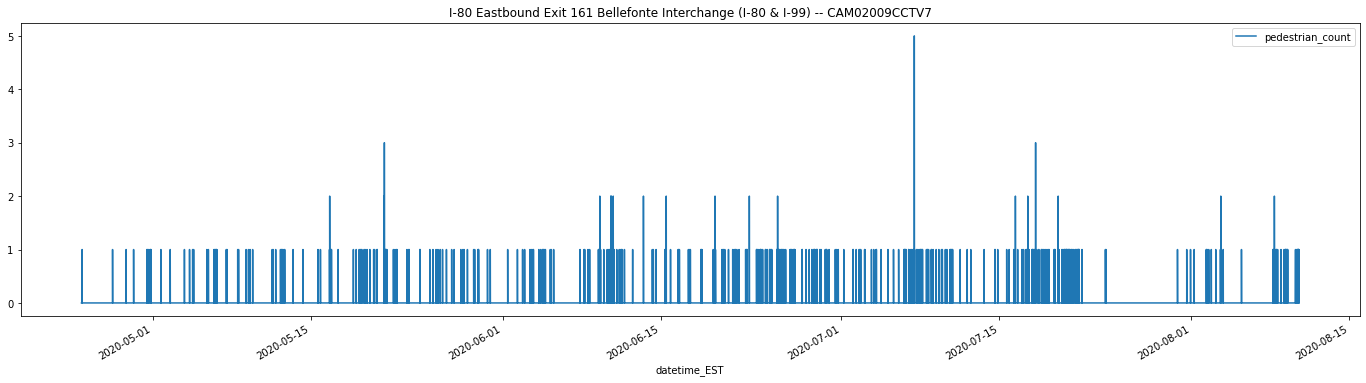

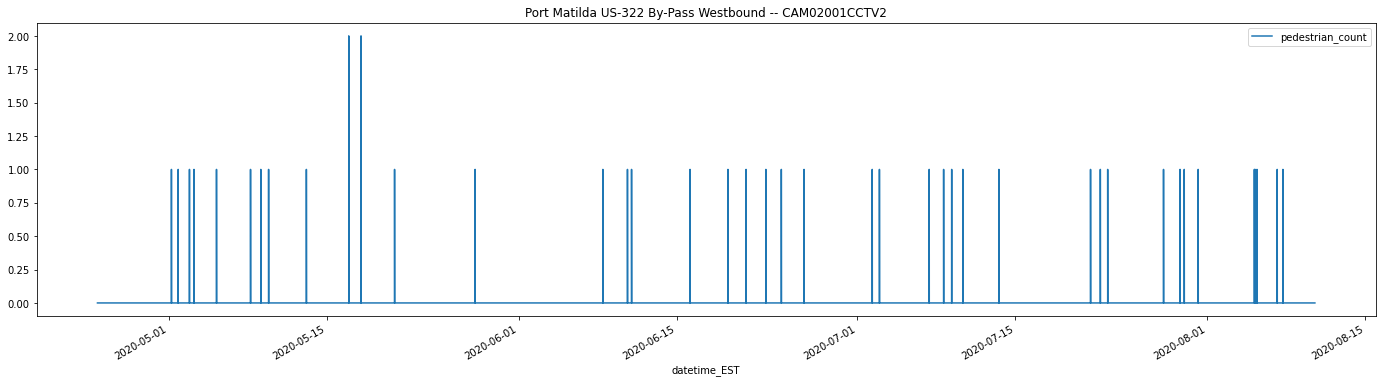

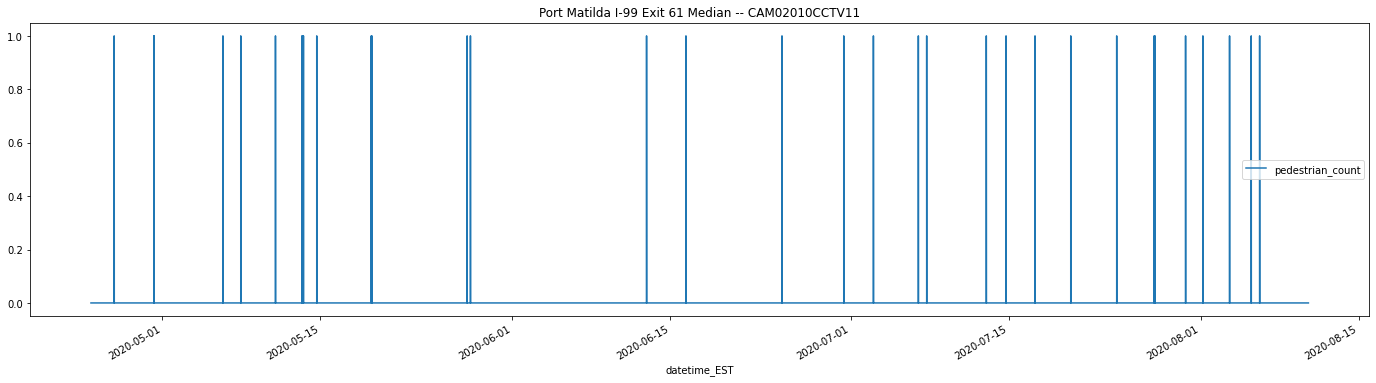

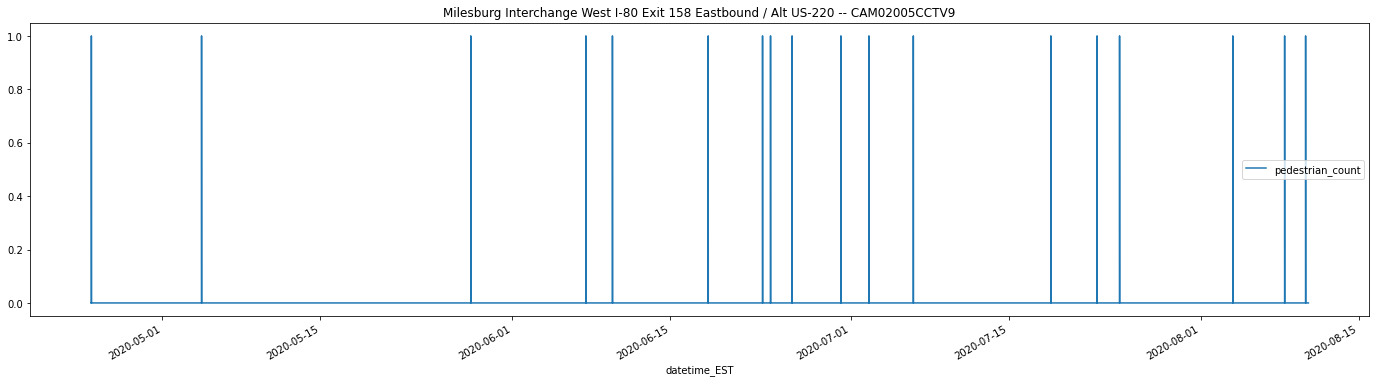

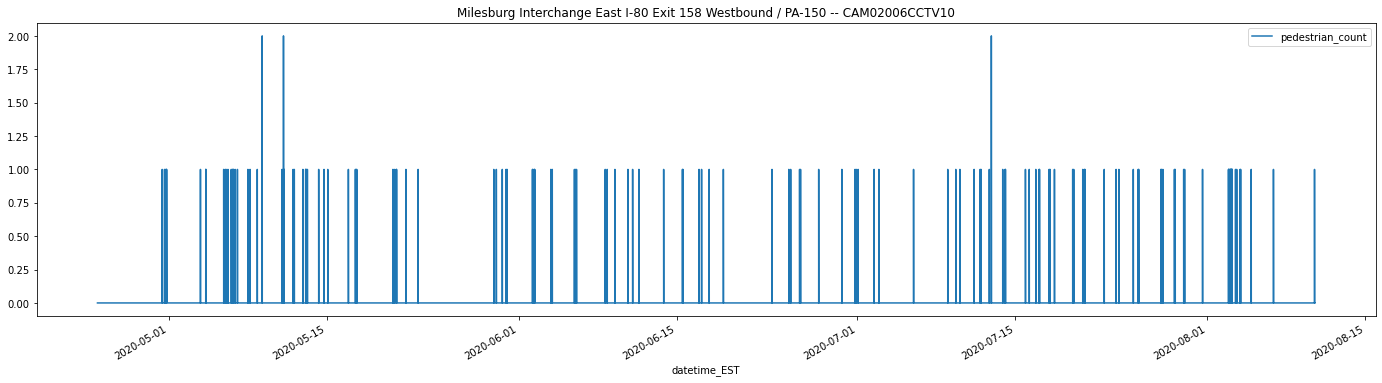

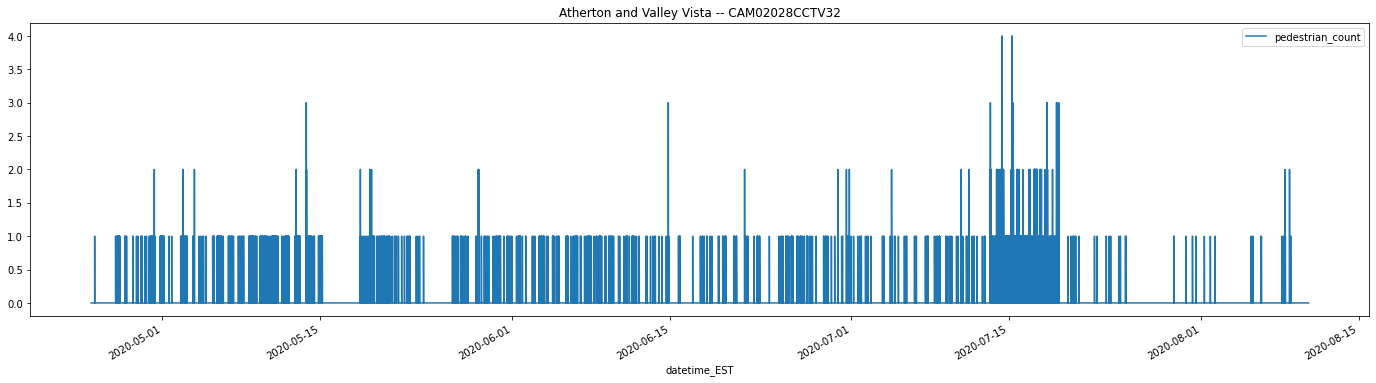

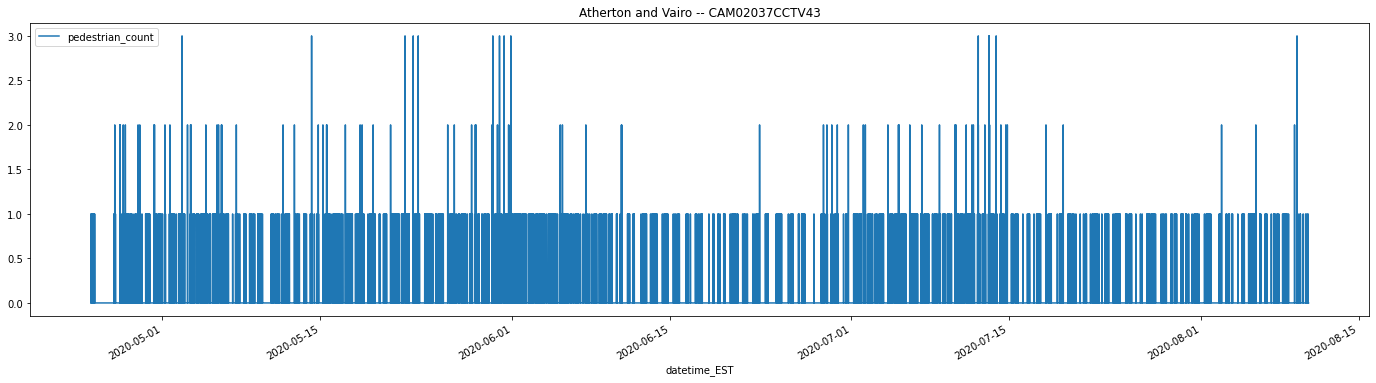

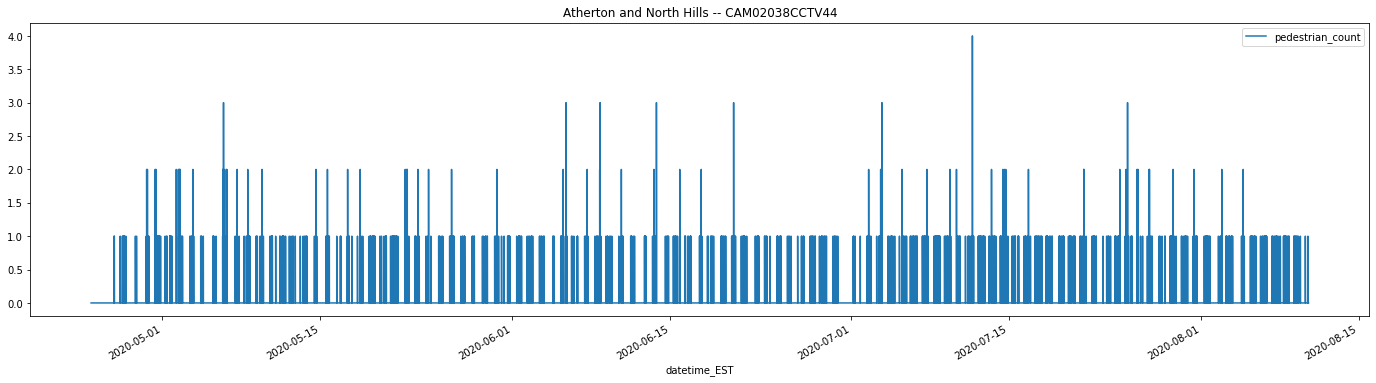

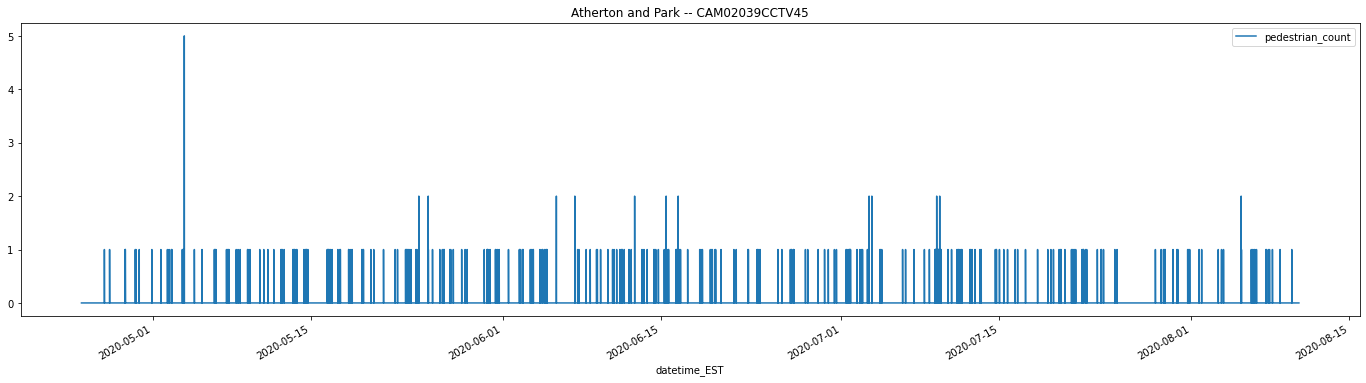

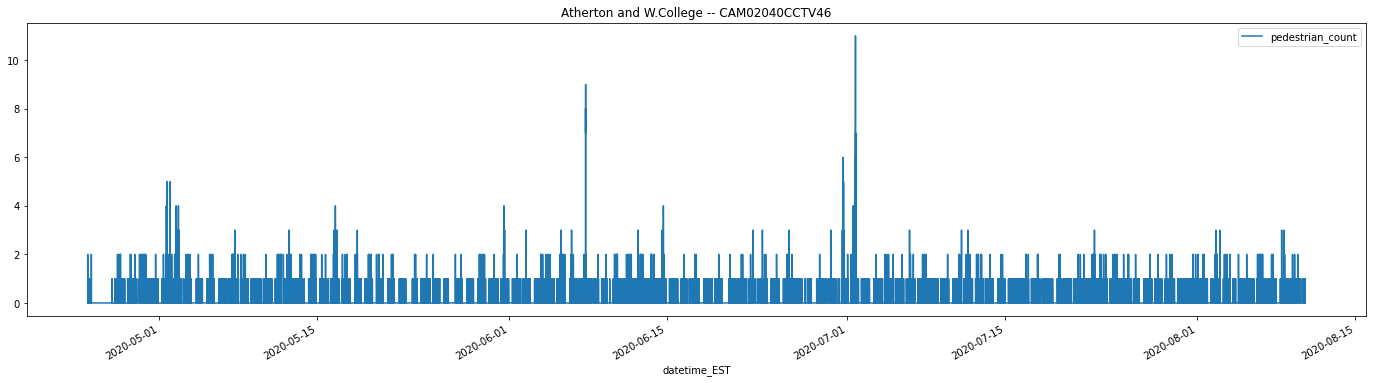

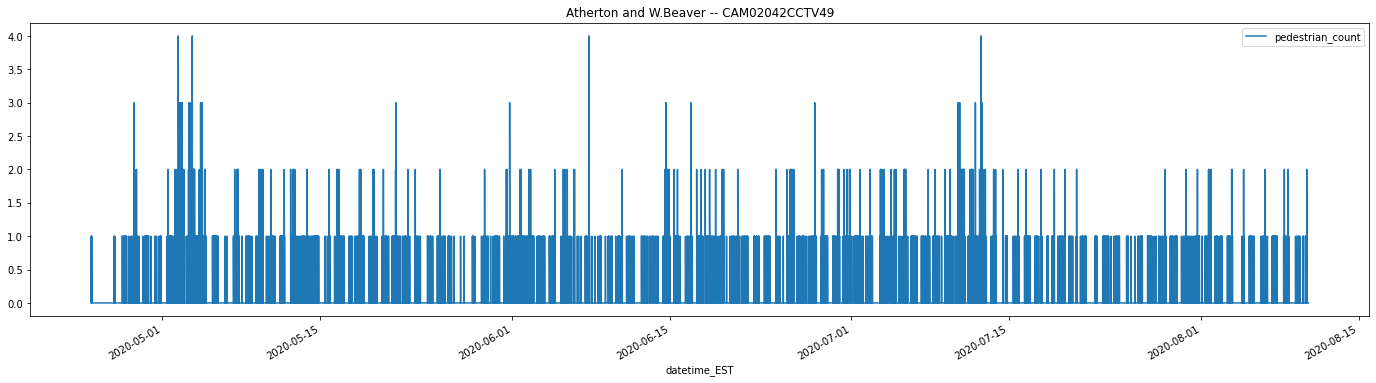

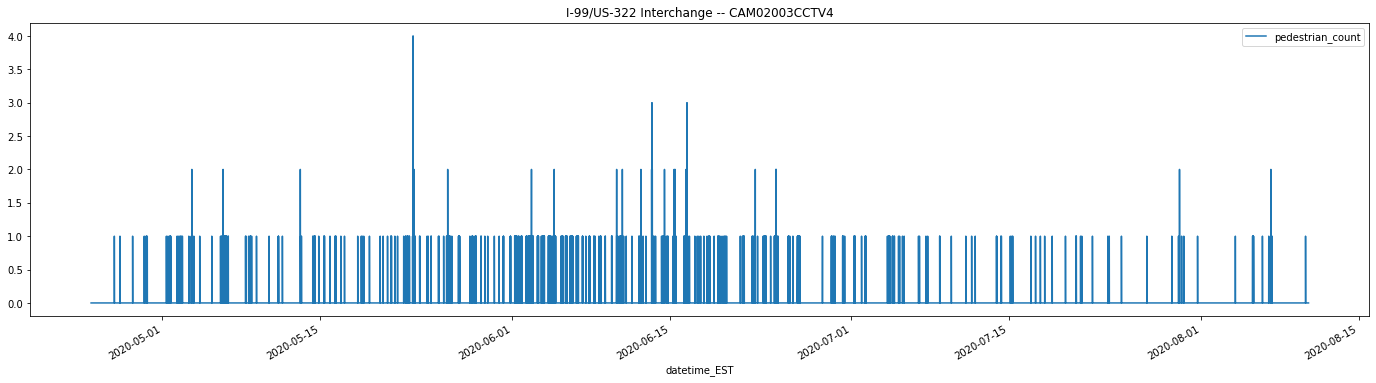

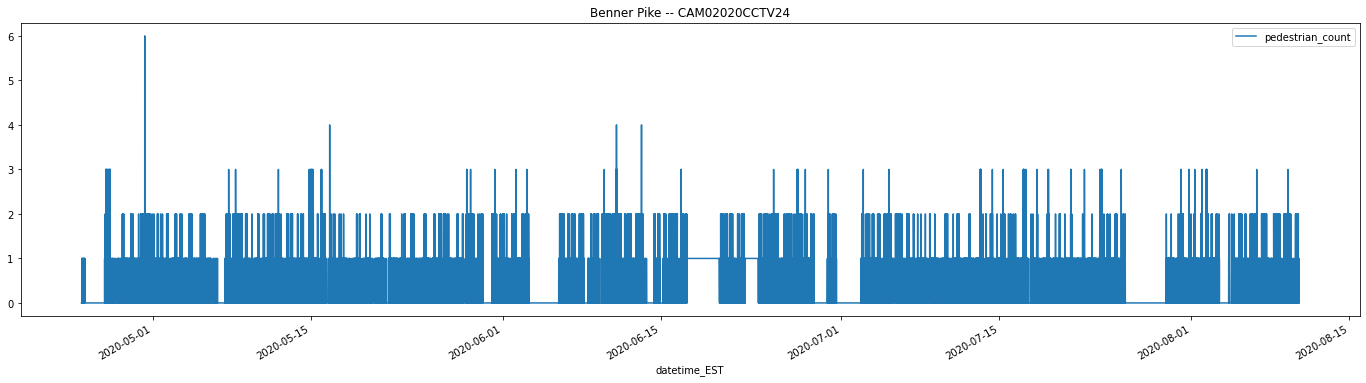

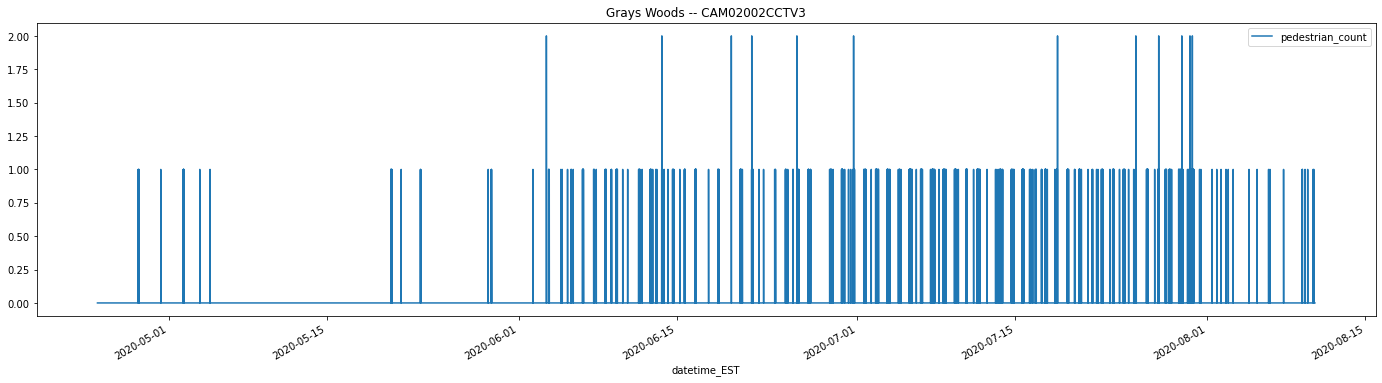

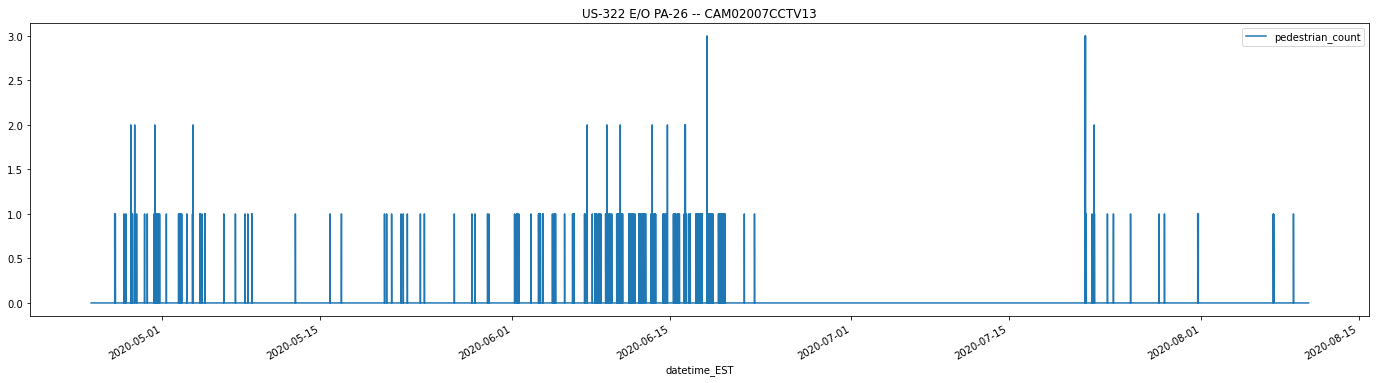

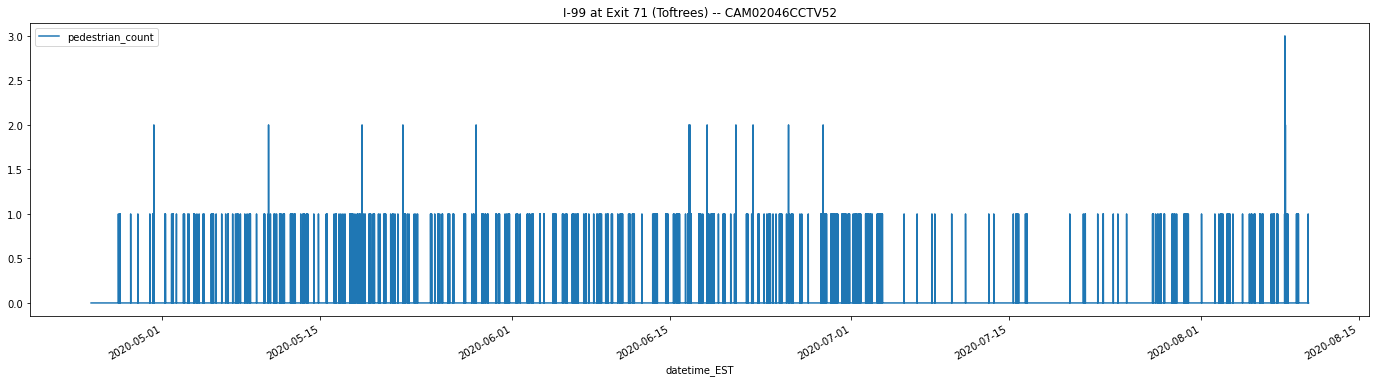

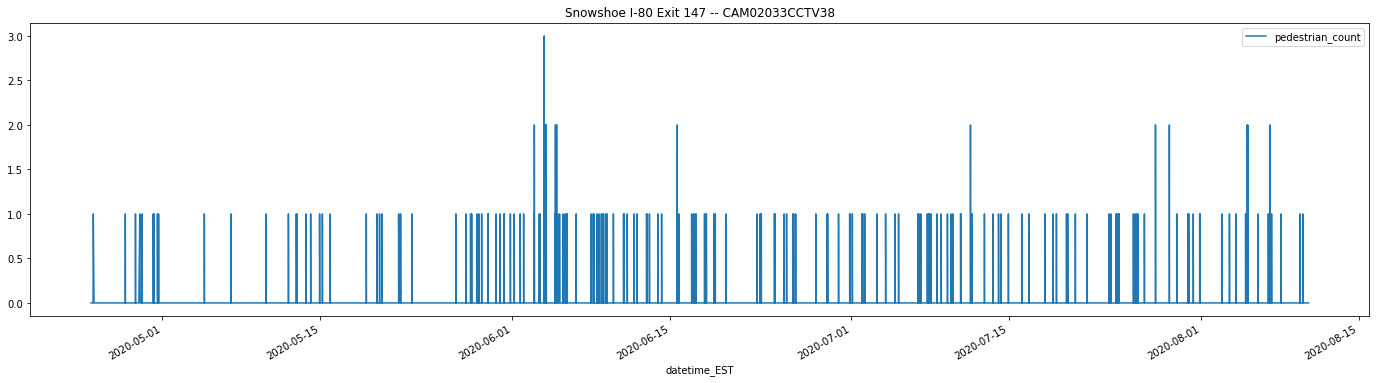

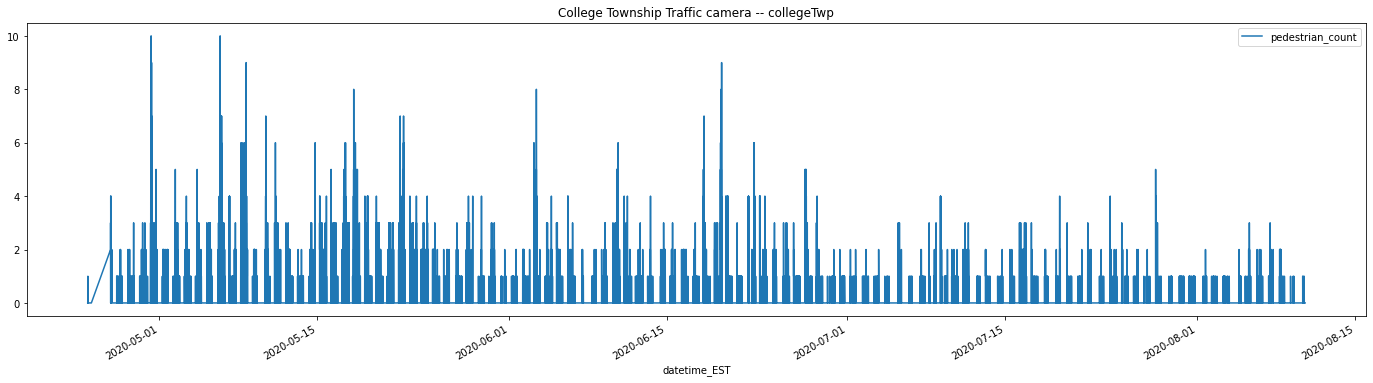

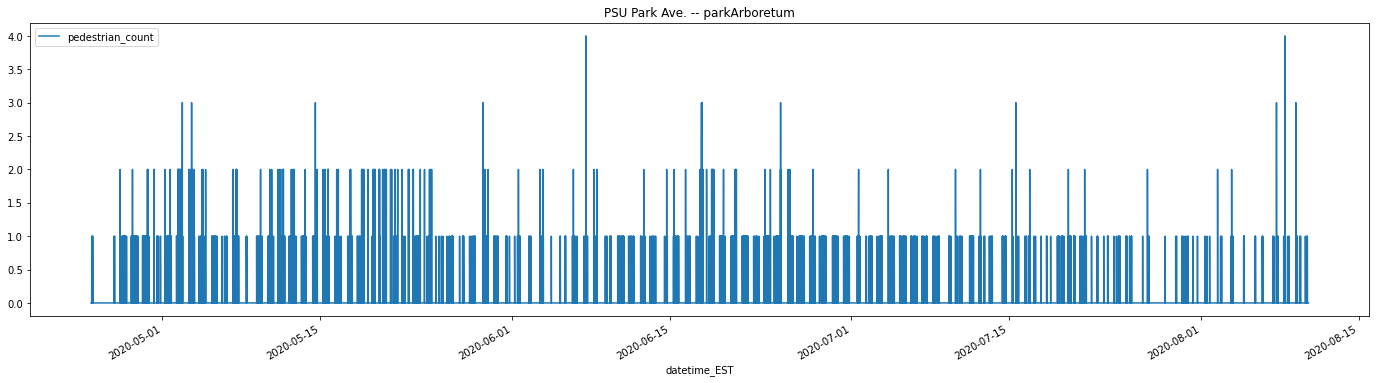

In [16]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = xdf[xdf['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_count', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

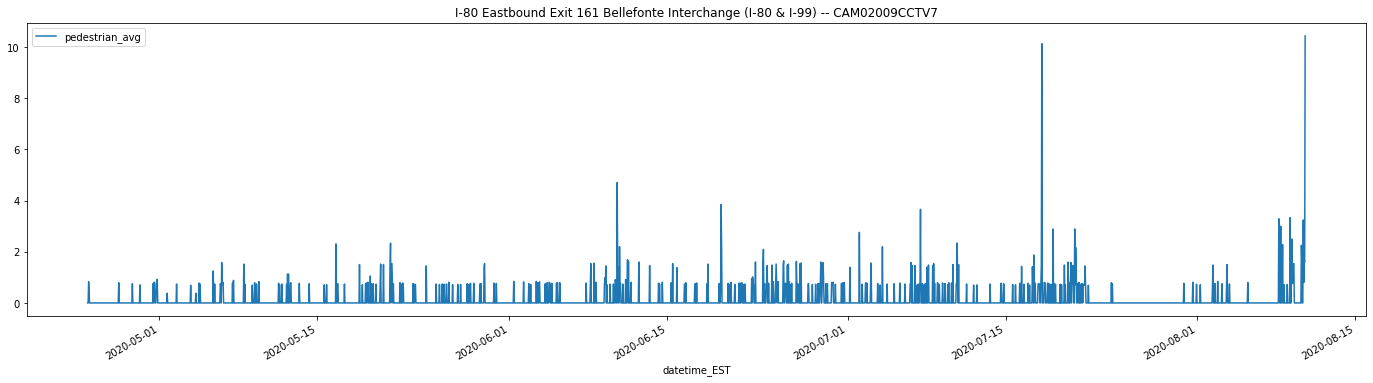

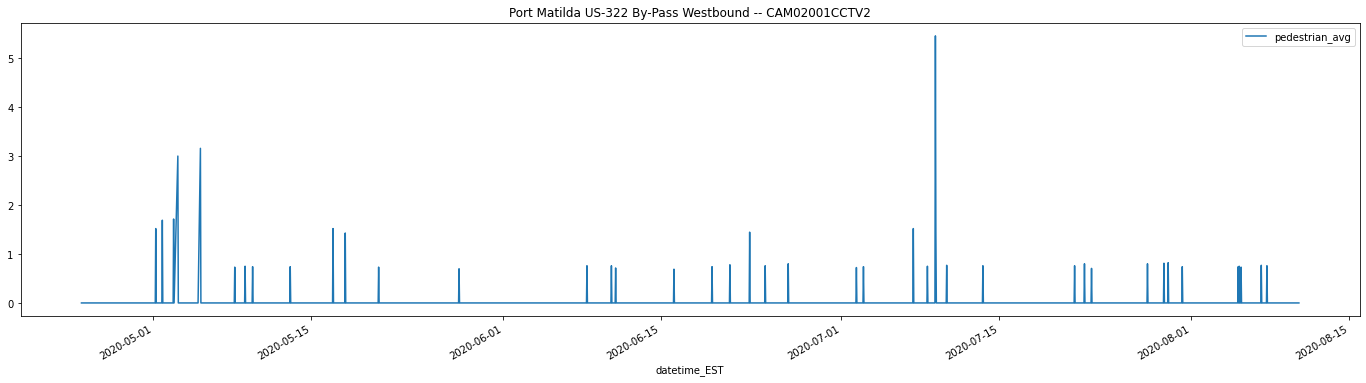

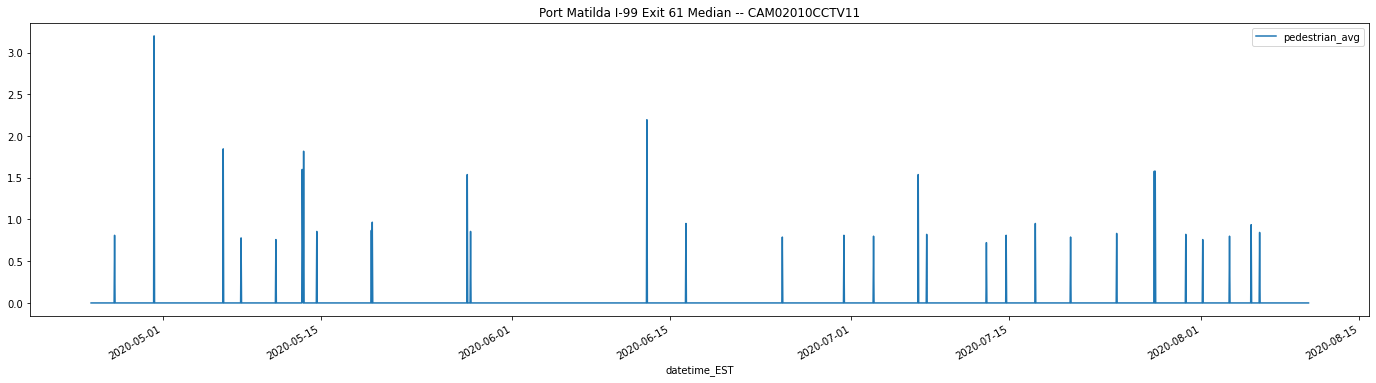

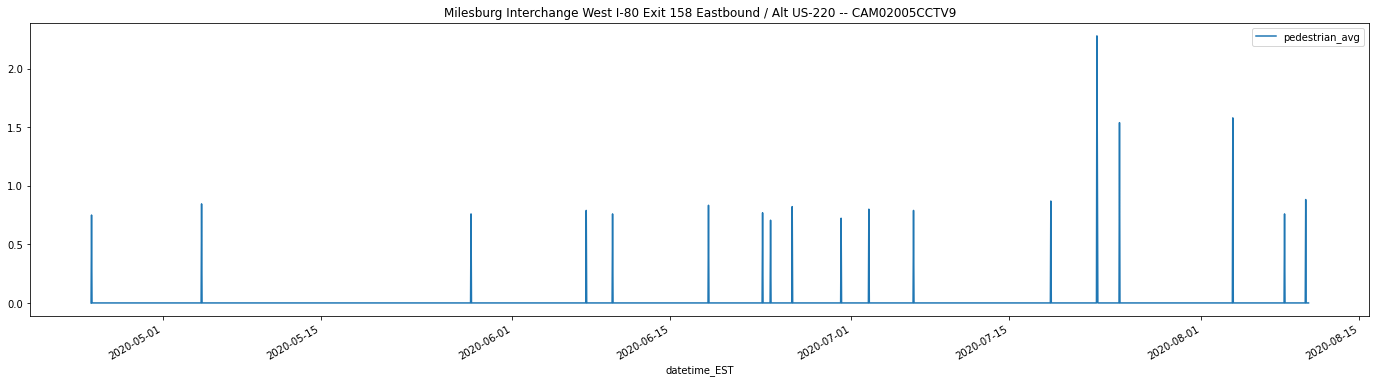

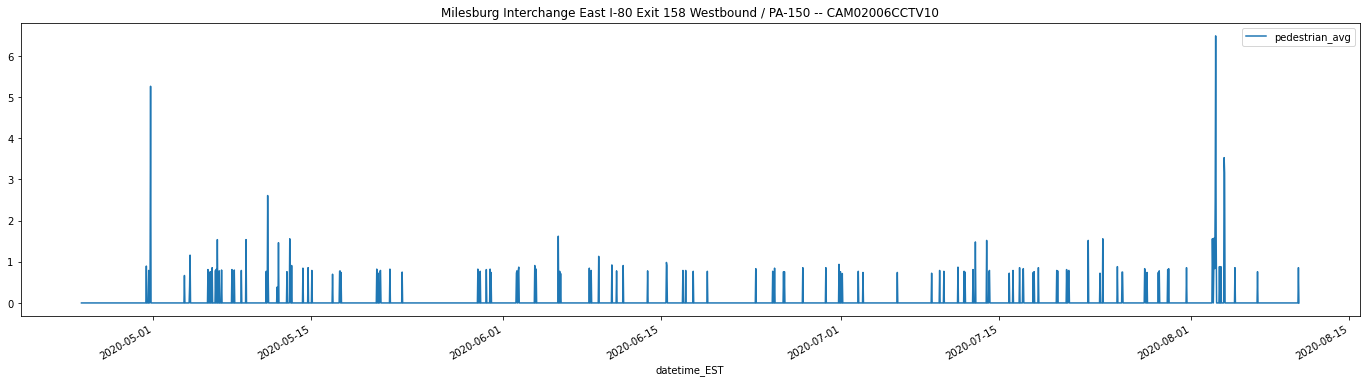

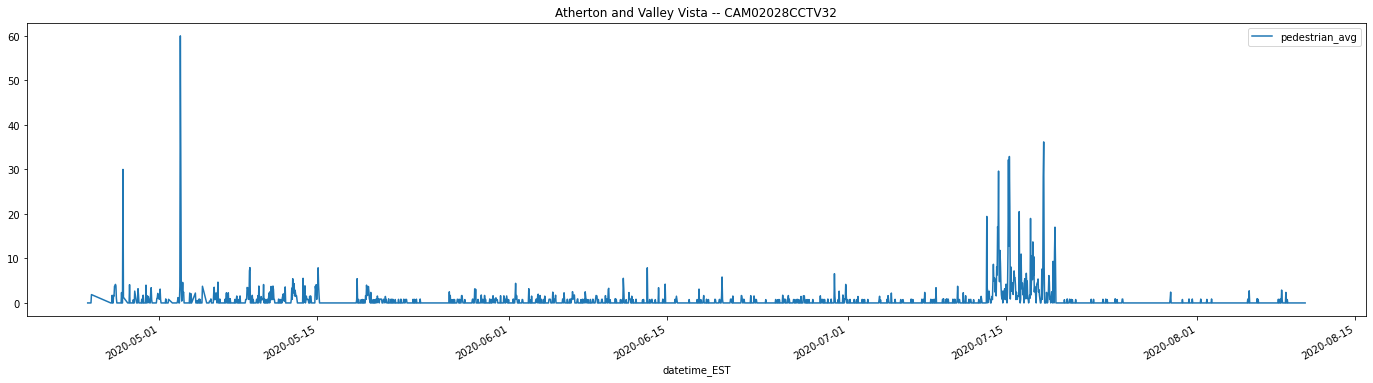

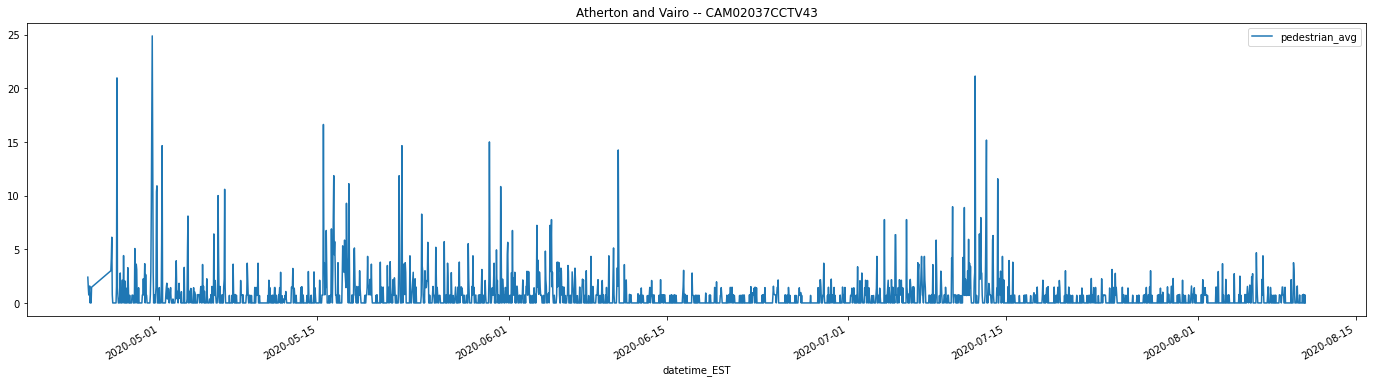

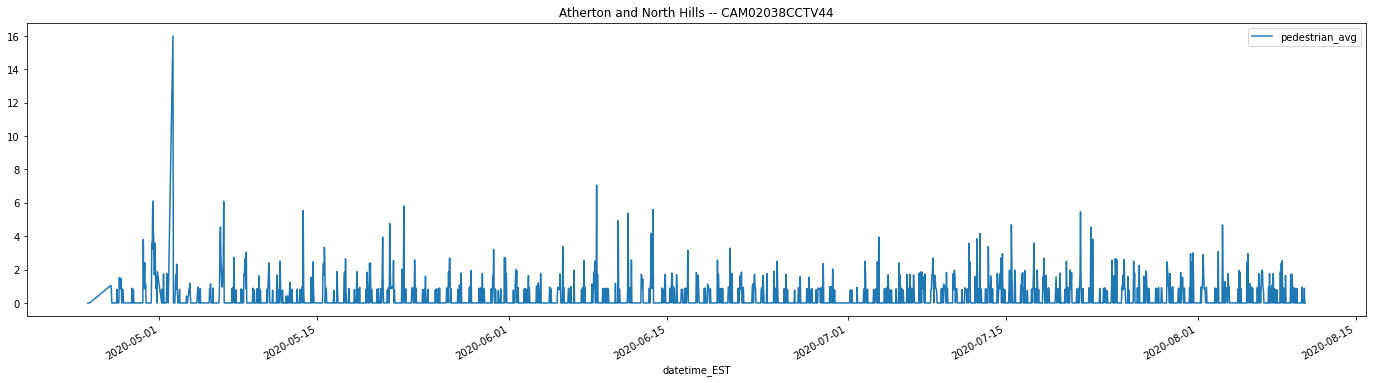

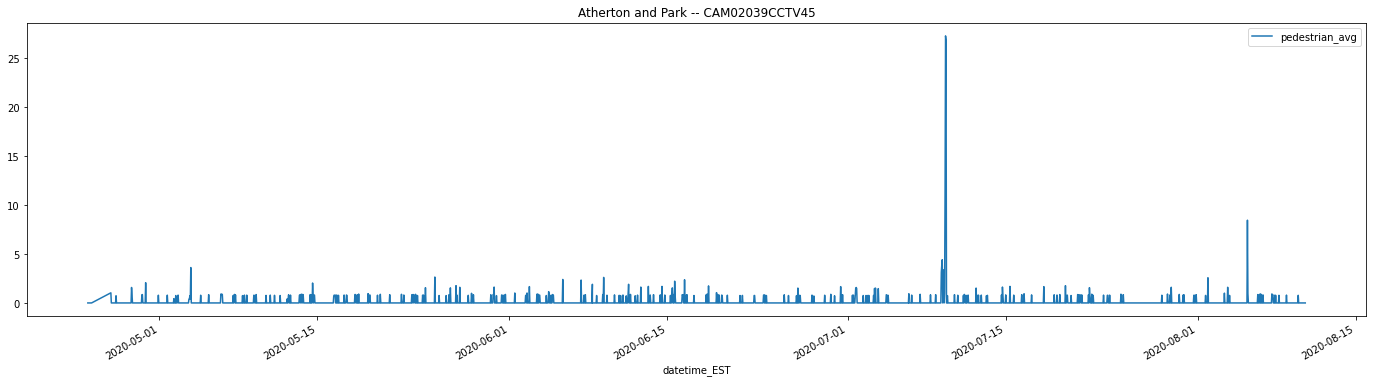

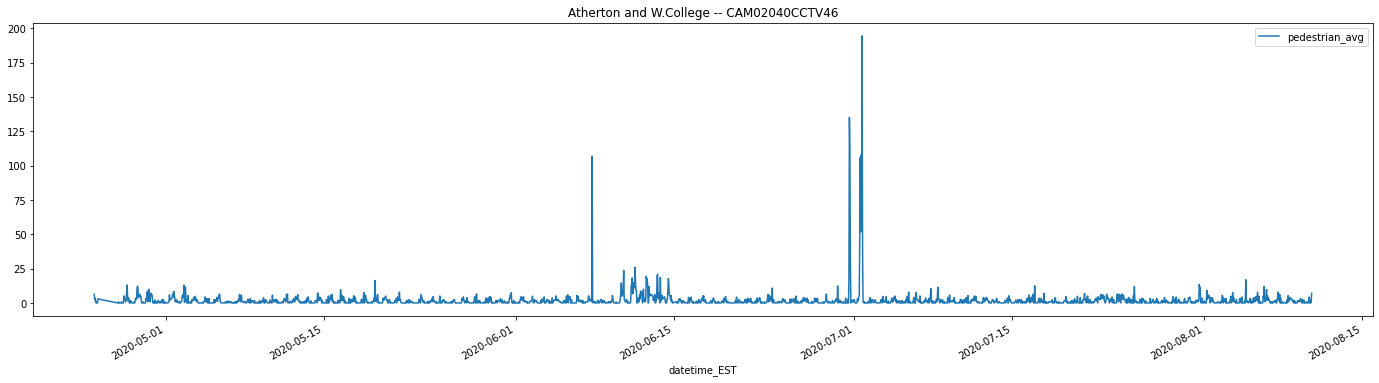

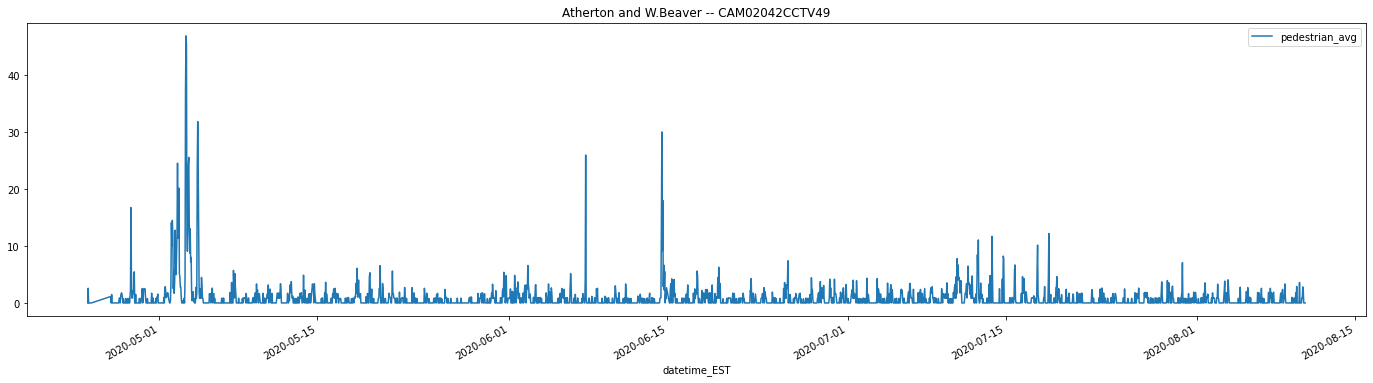

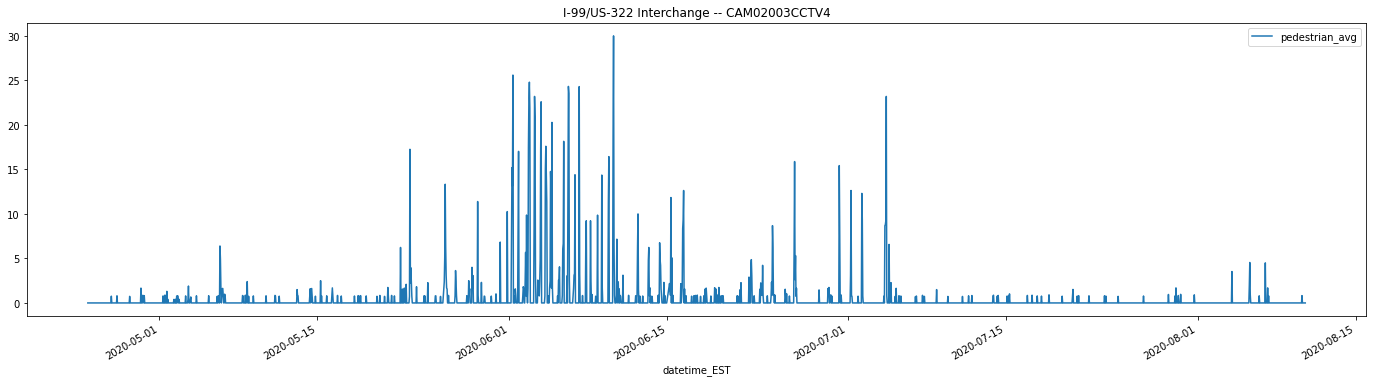

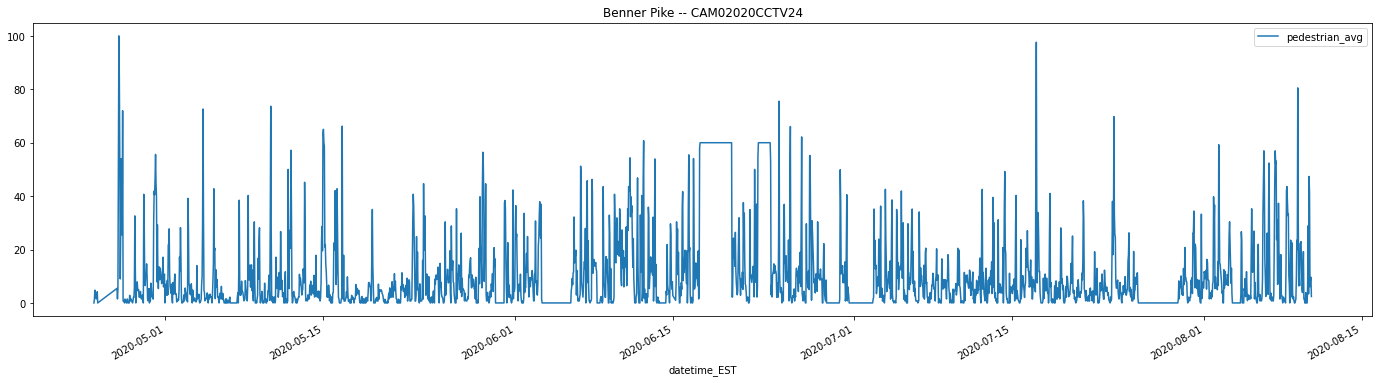

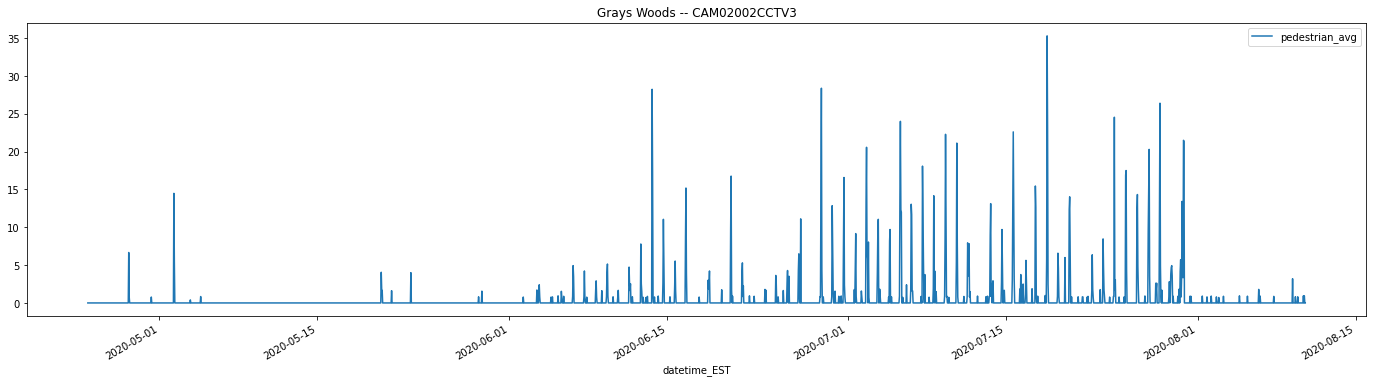

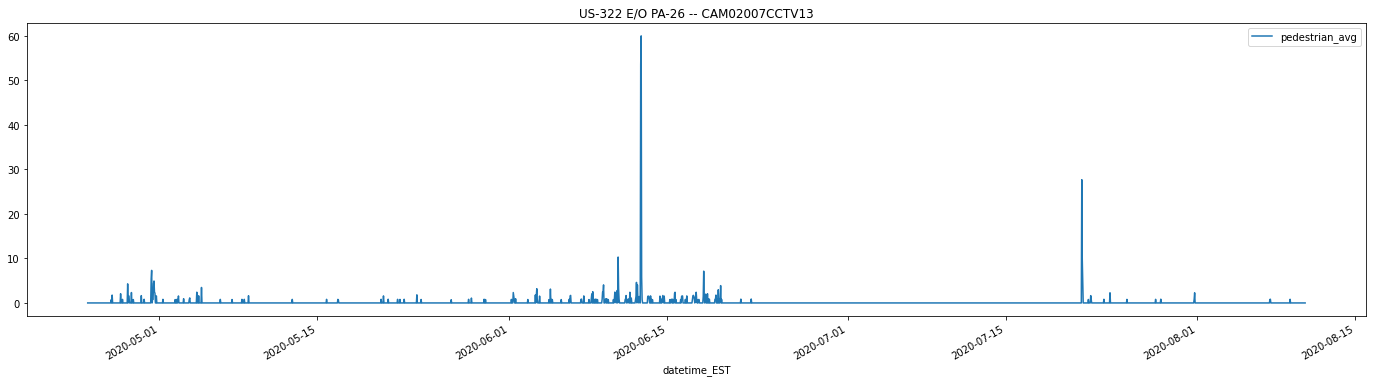

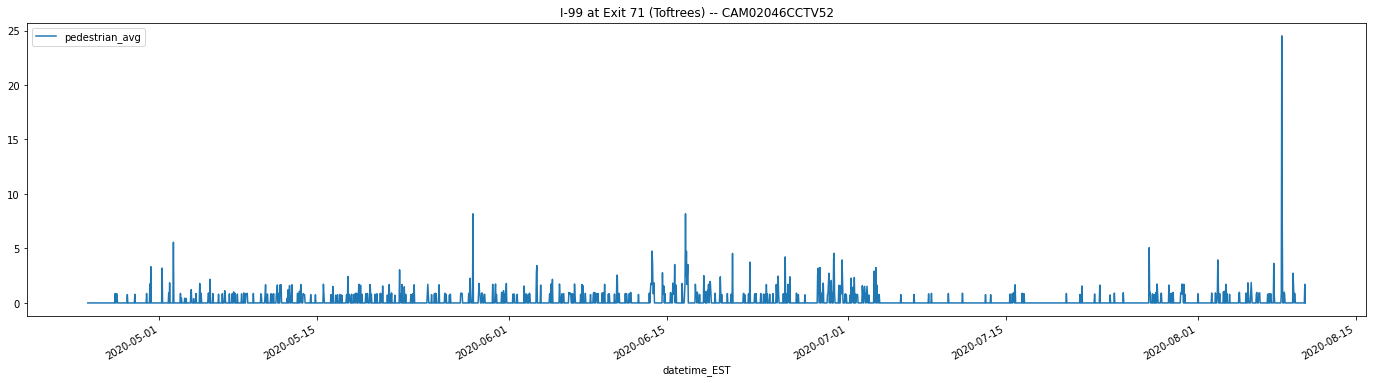

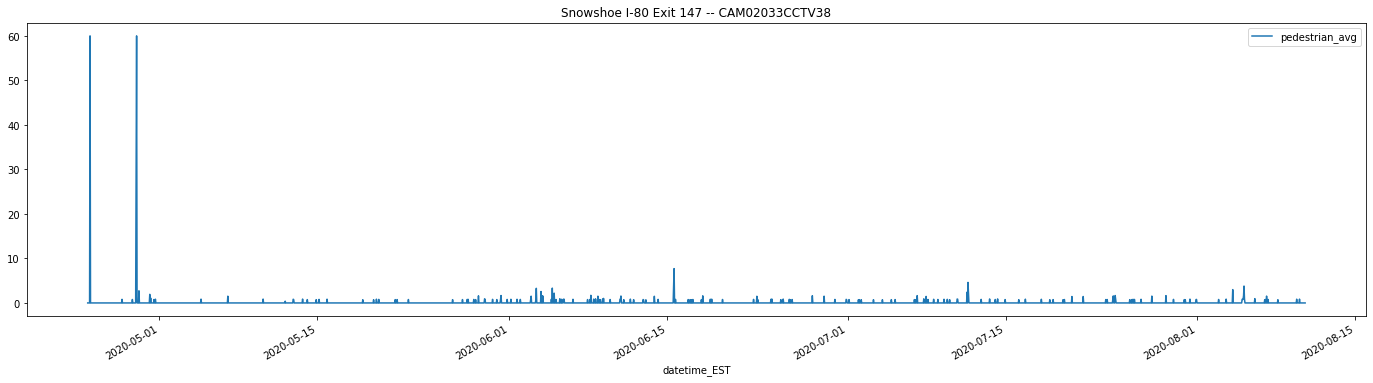

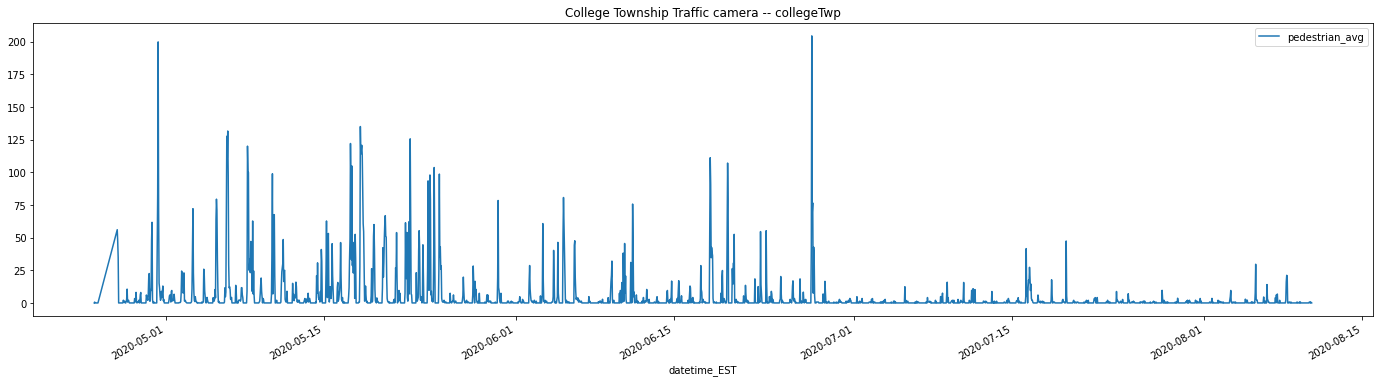

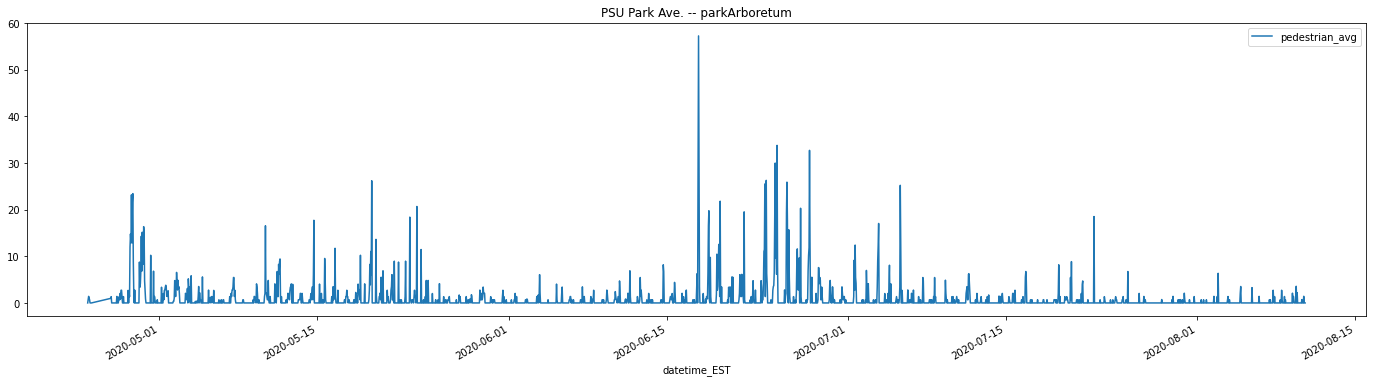

In [17]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [18]:
icdfcvc.to_csv("pedestrian_avg_per_hour_each_camera_427-810.csv",index=False)

In [19]:
xdf.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

In [20]:
df_sampledh

,datetime_EST,pedestrian_count
0,2020-04-24 16:00:00,3
1,2020-04-24 17:00:00,13
2,2020-04-24 18:00:00,14
3,2020-04-24 19:00:00,0
4,2020-04-24 20:00:00,6
...,...,...
2585,2020-08-10 09:00:00,62
2586,2020-08-10 10:00:00,13
2587,2020-08-10 11:00:00,16
2588,2020-08-10 12:00:00,19


In [21]:
icdfs.columns

Index(['datetime_EST', 'image_count_sum'], dtype='object')

In [22]:
#df_sampledh["image_count"] = icdfs['image_count_sum']
df_sampledh["image_count"] = icdfs['image_count_sum']

In [23]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.pedestrian_count) / (float(row.image_count)/(19.0 * 60.0)))
    return rv   

df_sampledh['pedestrian_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

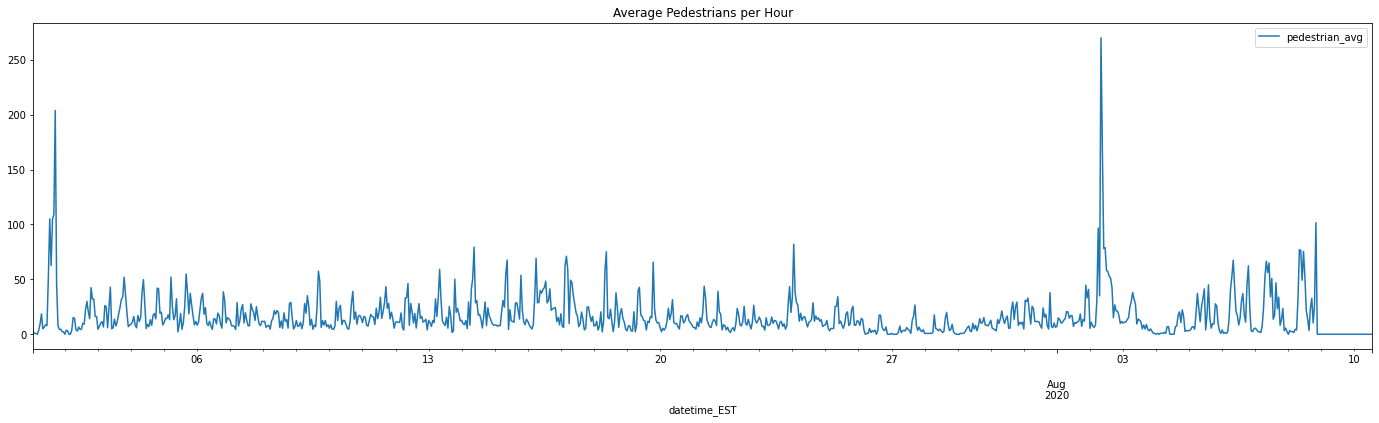

In [28]:
fromjul = df_sampledh[df_sampledh['datetime_EST'] > '2020-7-1 00:00:00']
ax = fromjul.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"Average Pedestrians per Hour")

In [24]:
df_sampledh.to_csv("pedestrian_avg_per_hour_all_cameras_427-810.csv",index=False)